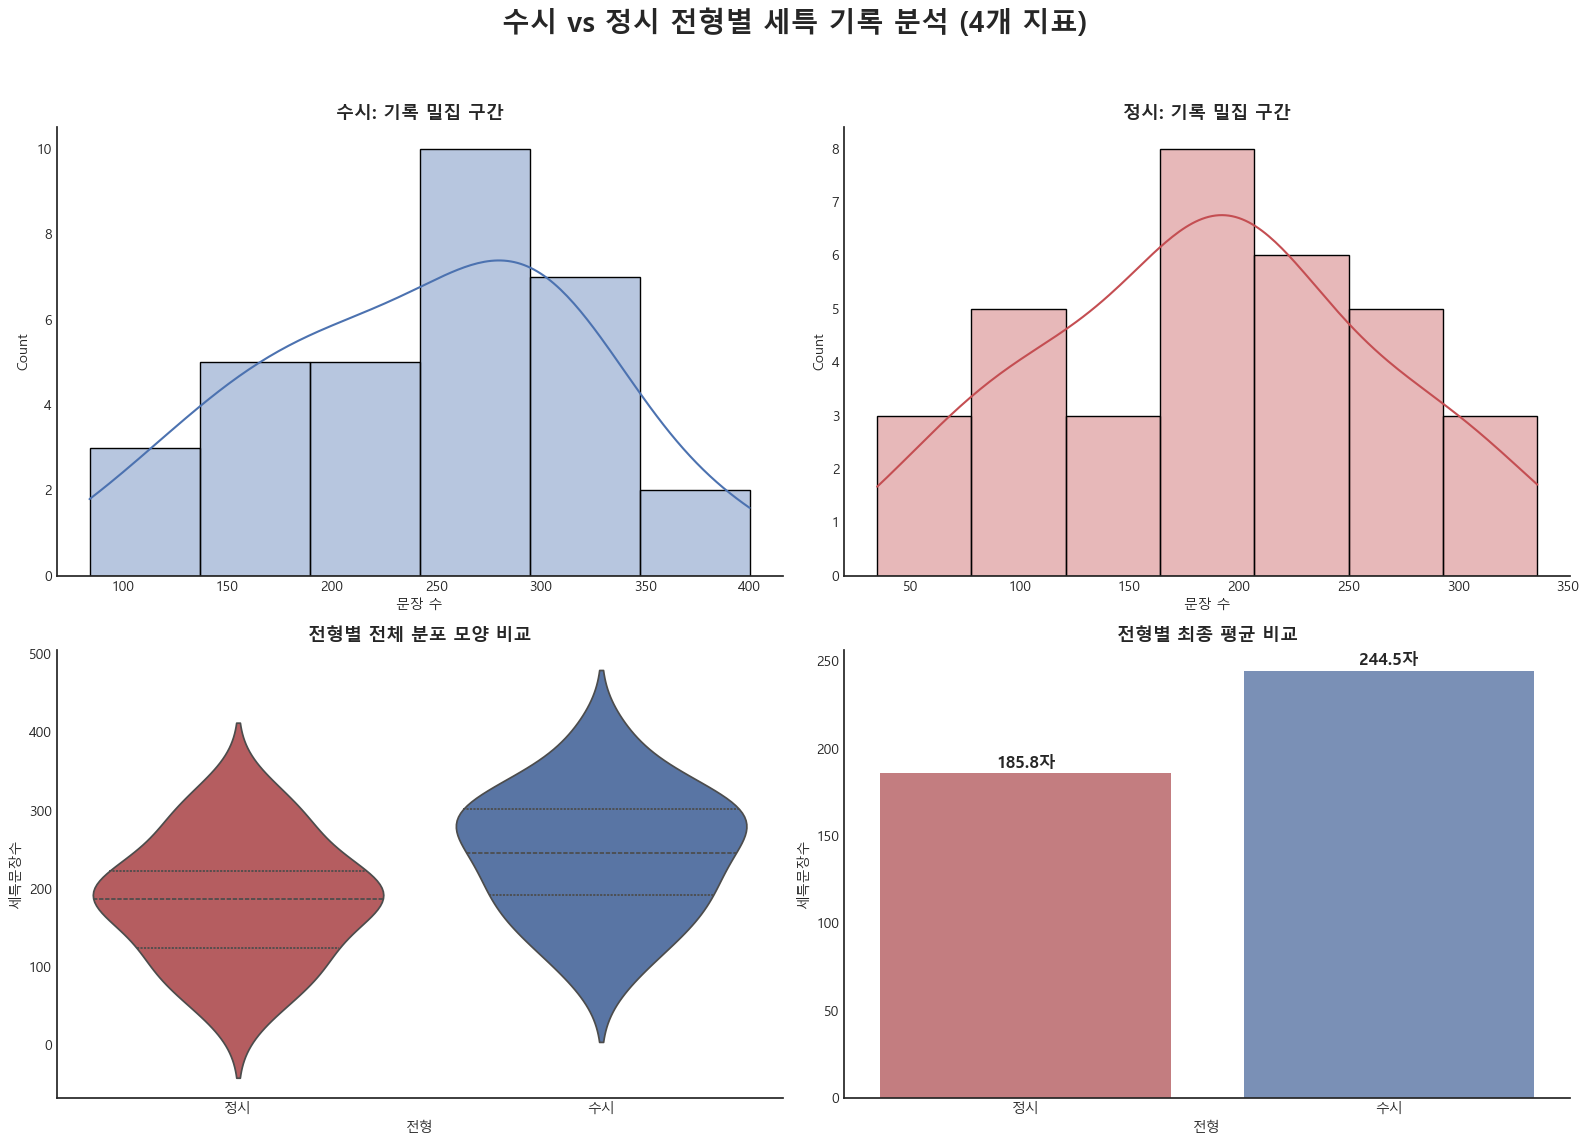

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 1. 한글 및 스타일 설정
plt.style.use('seaborn-v0_8-white')
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False 

# 2. 데이터 필터링 (미분류 제외)
file_name = '세특문장수_수시정시_구분.xlsx' 
df = pd.read_excel(file_name)
df.columns = df.columns.str.strip()

# 수시, 정시만 필터링 및 숫자 변환
df = df[df['전형'].isin(['수시', '정시'])]
df['세특문장수'] = pd.to_numeric(df['세특문장수'], errors='coerce')
df = df.dropna(subset=['세특문장수'])

# 3. 그래프 그리기 (2행 2열)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colors = {"수시": "#4C72B0", "정시": "#C44E52"}

# --- [1] 수시 전형 분포 (히스토그램) ---
sns.histplot(df[df['전형']=='수시']['세특문장수'], kde=True, ax=axes[0,0], color=colors['수시'], alpha=0.4)
axes[0,0].set_title('수시: 기록 밀집 구간', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel('문장 수')

# --- [2] 정시 전형 분포 (히스토그램) ---
sns.histplot(df[df['전형']=='정시']['세특문장수'], kde=True, ax=axes[0,1], color=colors['정시'], alpha=0.4)
axes[0,1].set_title('정시: 기록 밀집 구간', fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('문장 수')

# --- [3] 전형별 경향성 비교 (바이올린 플롯) ---
sns.violinplot(x='전형', y='세특문장수', data=df, ax=axes[1,0], hue='전형', palette=colors, legend=False, inner='quartile')
axes[1,0].set_title('전형별 전체 분포 모양 비교', fontsize=13, fontweight='bold')

# --- [4] 평균값 차이 분석 (바 플롯) ---
sns.barplot(x='전형', y='세특문장수', data=df, ax=axes[1,1], hue='전형', palette=colors, legend=False, errorbar=None, alpha=0.8)
axes[1,1].set_title('전형별 최종 평균 비교', fontsize=13, fontweight='bold')

# [수정 부분] 평균 수치 표시 위치: 막대 끝(m)보다 약간 위(+2)에, 정렬 기준은 바닥(bottom)으로
means = df.groupby('전형', sort=False)['세특문장수'].mean()
for i, m in enumerate(means):
    axes[1,1].text(i, m + 1, f'{m:.1f}자', 
                   ha='center', va='bottom', fontweight='bold', fontsize=12)

# 전체 레이아웃 정리
plt.suptitle('수시 vs 정시 전형별 세특 기록 분석 (4개 지표)', fontsize=20, fontweight='bold', y=0.98)
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()